<hr></hr>
<div style="text-align: center">
    <h1 style="font-family: Georgia; font-size: 20px;">PART II. CLASSIFICATION (CLASMODL):</p>
        <h2 style="font-family: Georgia; font-size: 18px;">JOAQUIN MOLTO (PID: 6119985)</p>
</div>
<hr></hr>

In [1]:
# IMPORT STATEMENTS
import sklearn as sk
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('C:/Users/jmolt/.matplotlib/stylelib/rose-pine.mplstyle')

In [2]:
XtrainDF = pd.read_csv('TR.csv')
XvalDF = pd.read_csv('TT.csv')
XtstDF = pd.read_csv('TS.csv')

y_trainDF = pd.read_csv('TR_CLS_TARGET_OH.csv')
y_valDF = pd.read_csv('TT_CLS_TARGET_OH.csv')
y_tstDF = pd.read_csv('TS_CLS_TARGET_OH.csv')

In [3]:
Xtrain = XtrainDF.to_numpy()
Xval = XvalDF.to_numpy()
Xtst = XtstDF.to_numpy()

y_train = y_trainDF.to_numpy()
y_val = y_valDF.to_numpy()
y_tst = y_tstDF.to_numpy()

In [4]:
Xtrain.shape, Xval.shape, Xtst.shape, y_train.shape, y_val.shape, y_tst.shape

((4872, 12), (1615, 12), (10, 12), (4872, 4), (1615, 4), (10, 4))

In [5]:
print(Xtrain.shape[0],Xtrain.shape[1])

4872 12


In [6]:
XtrainDF_STD = pd.read_csv('TR_STANDARDIZED.csv')
XvalDF_STD = pd.read_csv('TT_STANDARDIZED.csv')
XtstDF_STD = pd.read_csv('TS_STANDARDIZED.csv')

In [7]:
Xtrain_STD = XtrainDF_STD.to_numpy()
Xval_STD = XvalDF_STD.to_numpy()
Xtst_STD = XtstDF_STD.to_numpy()

In [8]:
Xtrain_STD.shape, Xval_STD.shape, Xtst_STD.shape, y_train.shape, y_val.shape, y_tst.shape

((4872, 12), (1615, 12), (10, 12), (4872, 4), (1615, 4), (10, 4))

In [9]:
print(Xtrain_STD.shape[0],Xtrain_STD.shape[1])

4872 12


***CLASMODL01***

In [10]:
# DEFINE MODEL ARCHITECTURE
clasmodl01 = Sequential([
    Dense(8, activation='relu', input_shape=(Xtrain.shape[1],)),
    Dense(4, activation='softmax')
])

In [11]:
# COMPILE THE MODEL
clasmodl01.compile(
    optimizer=RMSprop(), 
    loss="categorical_crossentropy", 
    metrics=['accuracy'])

In [ ]:
# TRAIN THE MODEL
history = clasmodl01.fit(
    Xtrain,
    y_train,
    epochs = 100,
    validation_data=(Xval,y_val)
)

In [13]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_acc_train = acc[-1]
final_loss_val = val_loss[-1]
final_acc_val = val_acc[-1]

In [14]:
print(f'Final Loss (Training): {final_loss_train}, Final Accuracy (Training): {final_acc_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final Accuracy (Validation): {final_acc_val}')

Final Loss (Training): 0.43704554438591003, Final Accuracy (Training): 0.8054187297821045
Final Loss (Validation): 0.5075479745864868, Final Accuracy (Validation): 0.7770897746086121


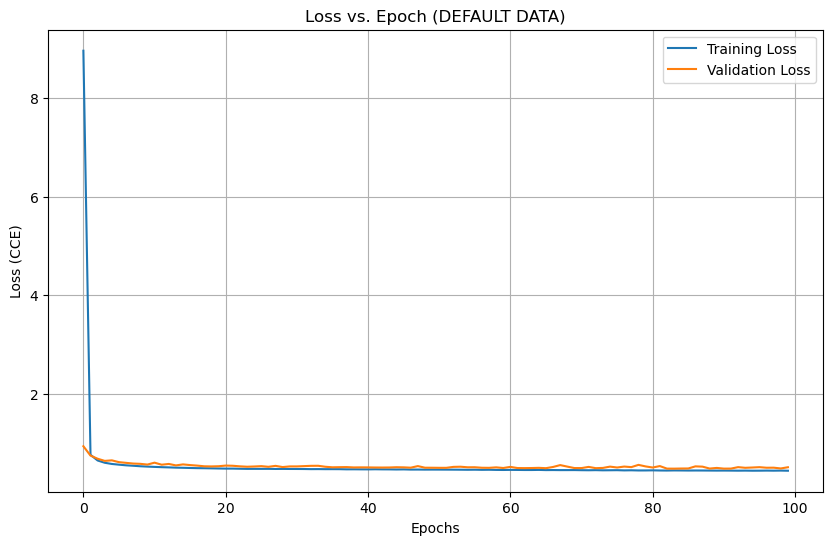

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (DEFAULT DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (CCE)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# COMPILE THE MODEL
clasmodl01.compile(
    optimizer=RMSprop(), 
    loss="categorical_crossentropy", 
    metrics=['accuracy'])

In [ ]:
# TRAIN THE MODEL
history = clasmodl01.fit(
    Xtrain_STD,
    y_train,
    epochs = 100,
    validation_data=(Xval_STD,y_val)
)

In [18]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_acc_train = acc[-1]
final_loss_val = val_loss[-1]
final_acc_val = val_acc[-1]

In [19]:
print(f'Final Loss (Training): {final_loss_train}, Final Accuracy (Training): {final_acc_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final Accuracy (Validation): {final_acc_val}')

Final Loss (Training): 0.38961753249168396, Final Accuracy (Training): 0.8271756768226624
Final Loss (Validation): 0.4623268246650696, Final Accuracy (Validation): 0.8204334378242493


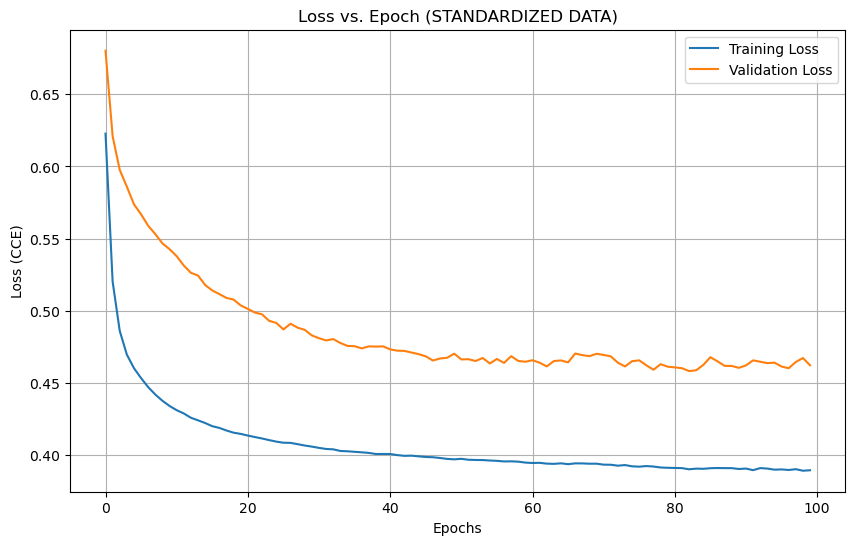

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (STANDARDIZED DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (CCE)')
plt.legend()
plt.grid(True)
plt.show()

***CLASMODL02***

In [21]:
# DEFINE MODEL ARCHITECTURE
clasmodl02 = Sequential([
    Dense(16, activation='relu', input_shape=(Xtrain.shape[1],)),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
])

In [22]:
# COMPILE THE MODEL
clasmodl02.compile(
    optimizer=RMSprop(), 
    loss="categorical_crossentropy", 
    metrics=['accuracy'])

In [ ]:
# TRAIN THE MODEL
history = clasmodl02.fit(
    Xtrain,
    y_train,
    epochs = 250,
    validation_data=(Xval,y_val)
)

In [24]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_acc_train = acc[-1]
final_loss_val = val_loss[-1]
final_acc_val = val_acc[-1]

In [25]:
print(f'Final Loss (Training): {final_loss_train}, Final Accuracy (Training): {final_acc_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final Accuracy (Validation): {final_acc_val}')

Final Loss (Training): 0.41282349824905396, Final Accuracy (Training): 0.8158866763114929
Final Loss (Validation): 0.46927961707115173, Final Accuracy (Validation): 0.8105263113975525


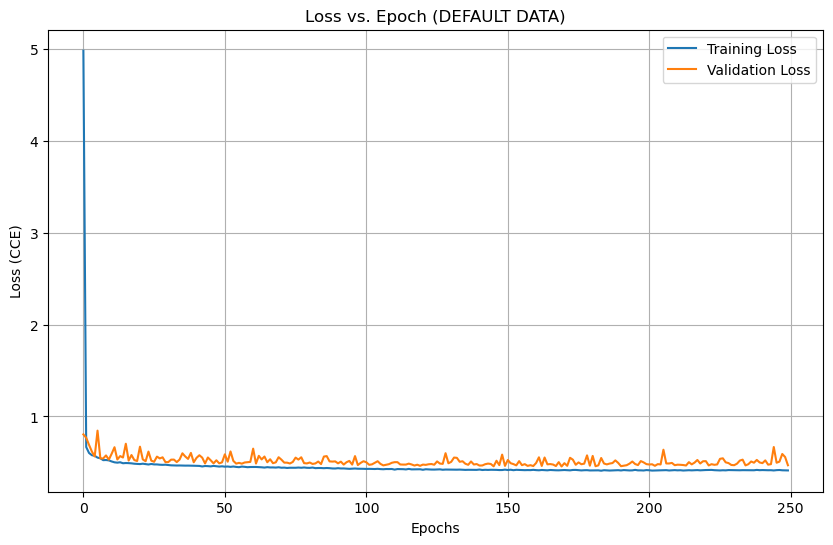

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (DEFAULT DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (CCE)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# COMPILE THE MODEL
clasmodl02.compile(
    optimizer=RMSprop(), 
    loss="categorical_crossentropy", 
    metrics=['accuracy'])

In [ ]:
# TRAIN THE MODEL
history = clasmodl02.fit(
    Xtrain_STD,
    y_train,
    epochs = 250,
    validation_data=(Xval_STD,y_val)
)

In [29]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_acc_train = acc[-1]
final_loss_val = val_loss[-1]
final_acc_val = val_acc[-1]

In [30]:
print(f'Final Loss (Training): {final_loss_train}, Final Accuracy (Training): {final_acc_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final Accuracy (Validation): {final_acc_val}')

Final Loss (Training): 0.32588276267051697, Final Accuracy (Training): 0.8624794483184814
Final Loss (Validation): 0.48632386326789856, Final Accuracy (Validation): 0.8173374533653259


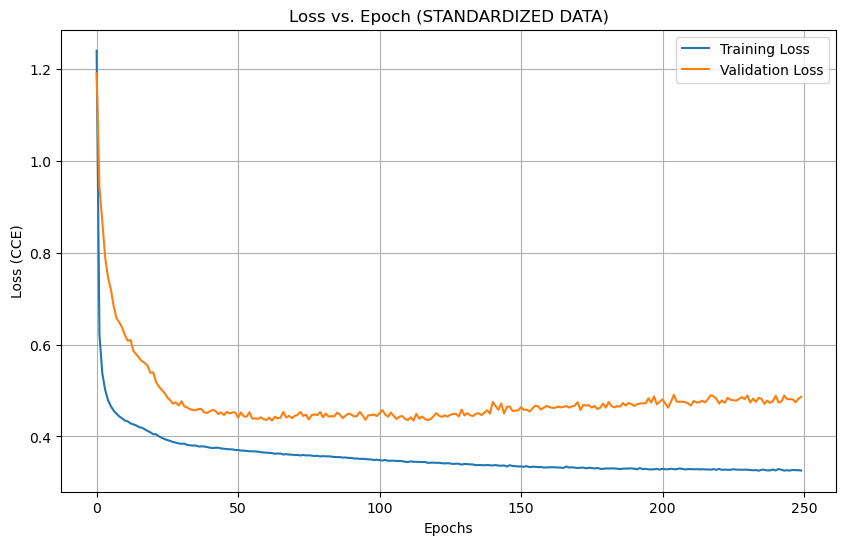

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (STANDARDIZED DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (CCE)')
plt.legend()
plt.grid(True)
plt.show()

***CLASMODL03***

In [32]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="clasmodl03.keras",
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=500,
    verbose=1,
    restore_best_weights=True
)

In [33]:
# DEFINE MODEL ARCHITECTURE
clasmodl02 = Sequential([
    Dense(32, activation='relu', input_shape=(Xtrain.shape[1],)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

In [34]:
# COMPILE THE MODEL
clasmodl02.compile(
    optimizer=RMSprop(), 
    loss="categorical_crossentropy", 
    metrics=['accuracy'])

In [ ]:
# TRAIN THE MODEL
history = clasmodl02.fit(
    Xtrain_STD,
    y_train,
    epochs = 500,
    validation_data=(Xval_STD,y_val),
    callbacks=[model_checkpoint_callback,early_stopping_callback]
)

In [36]:
# EXTRACT HISTORY FOR LOSS AND MAE ON THE TRAINING AND VALIDATION SET
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# REPORT THE FINAL LOSS AND MAE ON THE TRAINING AND VALIDATION SET
final_loss_train = loss[-1]
final_acc_train = acc[-1]
final_loss_val = val_loss[-1]
final_acc_val = val_acc[-1]

In [37]:
print(f'Final Loss (Training): {final_loss_train}, Final Accuracy (Training): {final_acc_train}')
print(f'Final Loss (Validation): {final_loss_val}, Final Accuracy (Validation): {final_acc_val}')

Final Loss (Training): 0.21356301009655, Final Accuracy (Training): 0.9115353226661682
Final Loss (Validation): 0.7759798765182495, Final Accuracy (Validation): 0.830340564250946


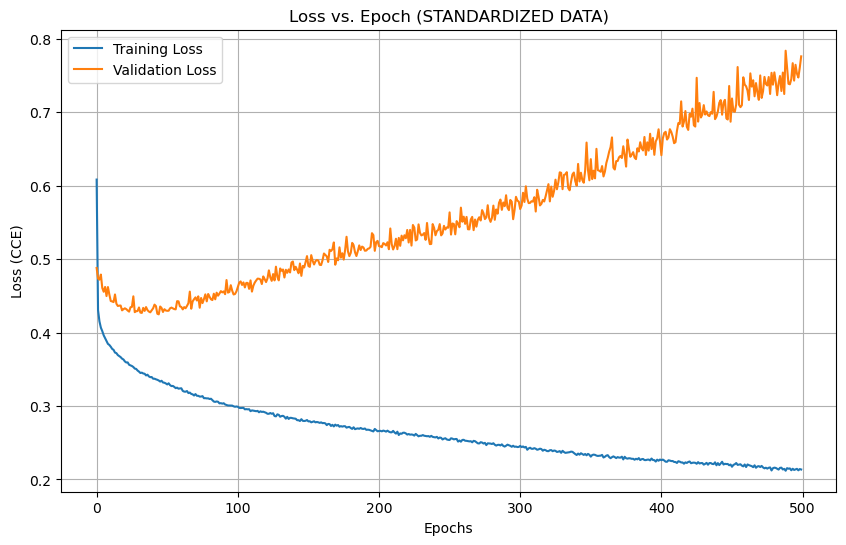

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (STANDARDIZED DATA)')
plt.xlabel('Epochs')
plt.ylabel('Loss (CCE)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Assuming 'val_loss' is being monitored
val_loss_history = history.history['val_loss']

# Find the epoch number with the lowest validation MAE
best_epoch = val_loss_history.index(min(val_loss_history)) + 1  # adding 1 because epochs are 1-indexed in logs
best_val_loss = min(val_loss_history)

print(f"The lowest validation loss was: {best_val_loss}") 
print(f"At epoch: {best_epoch}")

The lowest validation loss was: 0.4247453510761261
At epoch: 45


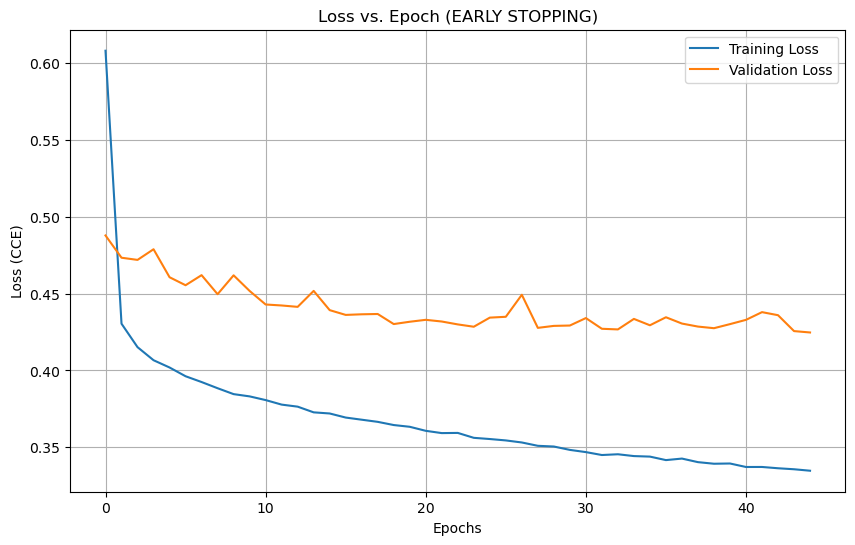

In [40]:
loss = history.history['loss'][:best_epoch]
val_loss = history.history['val_loss'][:best_epoch]

plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch (EARLY STOPPING)')
plt.xlabel('Epochs')
plt.ylabel('Loss (CCE)')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from tensorflow.keras.models import load_model

clasmodl03 = load_model('clasmodl03.keras')
y_pred = clasmodl03.predict(Xtst_STD)

1/1 [==============================] - 0s 96ms/step


In [42]:
y_tst

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [43]:
y_tst_argmax = np.argmax(y_tst, axis=1)

In [44]:
y_tst_argmax

array([1, 1, 2, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

In [45]:
y_pred

array([[1.3998745e-01, 8.2713997e-01, 3.2865651e-02, 6.9142520e-06],
       [3.0806675e-04, 9.1591090e-01, 8.3780818e-02, 2.4190538e-07],
       [1.9920767e-04, 9.0744448e-01, 9.2353180e-02, 3.1403667e-06],
       [2.4322237e-04, 9.6053547e-01, 3.9221343e-02, 2.2080545e-08],
       [3.0347140e-04, 8.2655603e-01, 1.7313604e-01, 4.3929358e-06],
       [1.4552487e-02, 9.4477135e-01, 4.0663201e-02, 1.2927101e-05],
       [1.1321844e-04, 3.7643611e-01, 6.2343681e-01, 1.3908181e-05],
       [1.1809849e-05, 7.9043764e-01, 2.0955044e-01, 5.0718256e-08],
       [1.3860335e-04, 9.7240394e-01, 2.7457401e-02, 2.1441380e-08],
       [6.4478215e-04, 7.1244025e-01, 2.8690794e-01, 6.9616053e-06]],
      dtype=float32)

In [46]:
y_pred_argmax = np.argmax(y_pred, axis=1)

In [47]:
y_pred_argmax

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int64)

In [48]:
# Assuming y_pred are the probabilities from the model's softmax layer
# Convert probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Assuming y_test are the actual targets in one-hot encoded format
# Convert one-hot encoded targets back to class labels
y_test_labels = np.argmax(y_tst, axis=1)

# Iterate through all predictions and actual targets
for i in range(len(y_pred_labels)):
    prediction_label = y_pred_labels[i]
    actual_label = y_test_labels[i]
    # Compare predicted class label with actual class label
    hit = "1" if prediction_label == actual_label else "0"
    print(f"Prediction: {prediction_label}, Actual: {actual_label}, Hit: {hit}")

Prediction: 1, Actual: 1, Hit: 1
Prediction: 1, Actual: 1, Hit: 1
Prediction: 1, Actual: 2, Hit: 0
Prediction: 1, Actual: 1, Hit: 1
Prediction: 1, Actual: 1, Hit: 1
Prediction: 1, Actual: 1, Hit: 1
Prediction: 2, Actual: 1, Hit: 0
Prediction: 1, Actual: 1, Hit: 1
Prediction: 1, Actual: 2, Hit: 0
Prediction: 1, Actual: 1, Hit: 1


***RANDOM CLASSIFIER***

In [72]:
y_test_labels

array([1, 1, 2, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

In [96]:
import copy
test_labels_copy = copy.copy(y_test_labels)
np.random.shuffle(test_labels_copy)

In [97]:
hits_array = np.array(y_test_labels) == np.array(test_labels_copy)
random_accuracy = hits_array.mean()

print(f"Random Classifier ACC: {random_accuracy}")

Random Classifier ACC: 0.6
